# Import Libaries

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv('drive/MyDrive/Loan Prediction Based on Customer Behavior/Training Data.csv')
# test_df = pd.read_csv('drive/MyDrive/Loan Prediction Based on Customer Behavior/Test Data.csv')
# subm = pd.read_csv('drive/MyDrive/Loan Prediction Based on Customer Behavior/Sample Prediction Dataset.csv')

# Visualization visual inspection of Dataset

In [ ]:
train_df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


In [ ]:
objects = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY','STATE']
for i in objects:
    print('Num of unique Values in' , i , ' = ',  (train_df[i].nunique()))

Num of unique Values in Married/Single  =  2
Num of unique Values in House_Ownership  =  3
Num of unique Values in Car_Ownership  =  2
Num of unique Values in Profession  =  51
Num of unique Values in CITY  =  317
Num of unique Values in STATE  =  29


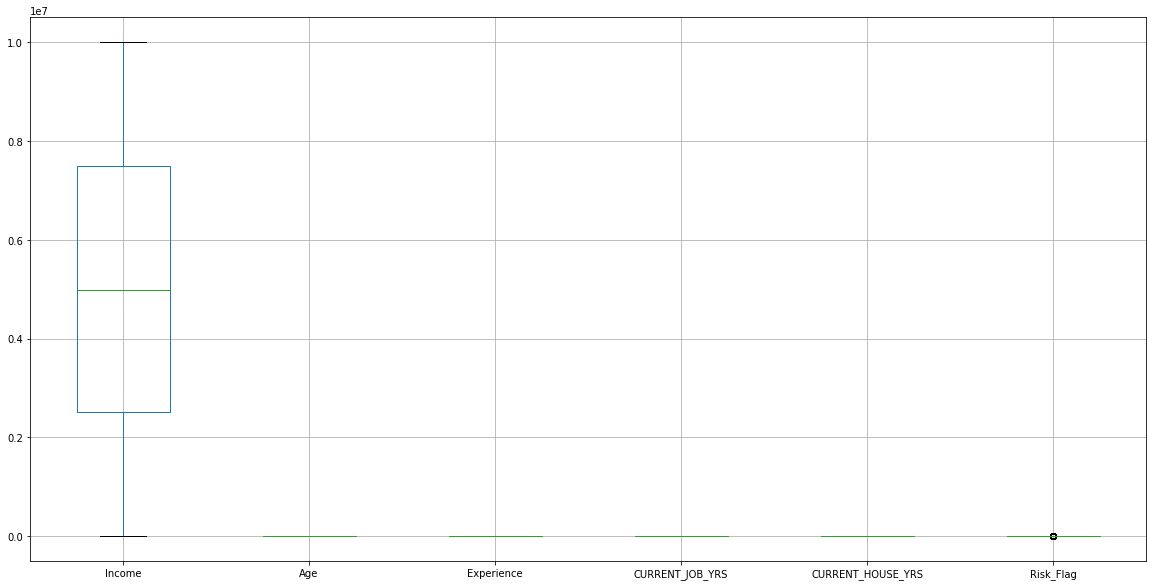

In [ ]:
#Box Plot for each input variable
pd.plotting.boxplot_frame(train_df,figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8800873b50>,
      dtype=object)

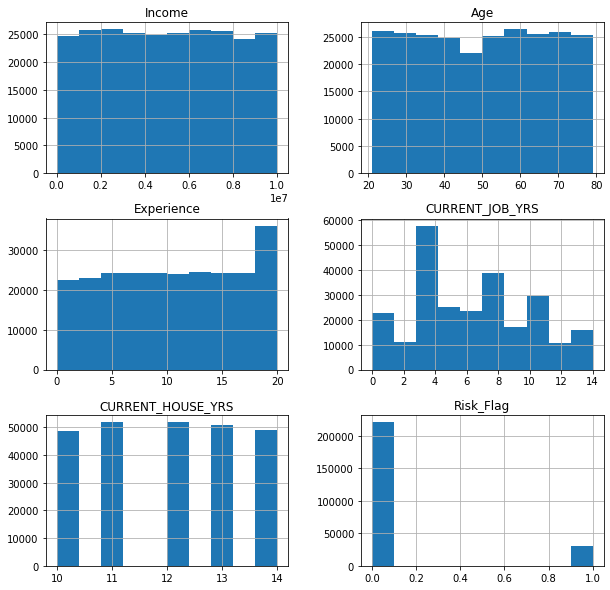

In [ ]:
#Histogram Plot for each input variable

pd.plotting.hist_frame(train_df,figsize=(10,10))


In [ ]:
corr_with_y = train_df.corr()['Risk_Flag'].drop('Risk_Flag').sort_values()
corr_with_y

Experience          -0.010703
CURRENT_HOUSE_YRS   -0.004793
CURRENT_JOB_YRS     -0.003479
Income               0.000527
Age                  0.003828
Name: Risk_Flag, dtype: float64

# Split And Prepare The Data

## **Encode Text Data**

In [ ]:
binary_class = ['Married/Single', 'Car_Ownership']
one_hot_enc = ['House_Ownership', 'Profession', 'CITY','STATE']

def prep(df):
    lab_enc = LabelEncoder()
    binary_class = ['Married/Single', 'Car_Ownership']
    for column in binary_class:
        df[column] = lab_enc.fit_transform (df[column].values)
    for column in one_hot_enc:
        one_hot = pd.get_dummies ( df[column],
                    drop_first = True)
        df = pd.concat([df, one_hot], axis=1)
        df.drop (column, axis = 1, inplace = True )
    return df

train_df = prep(train_df)

## **Split Data**

In [ ]:
X = train_df.drop ('Risk_Flag', axis=1)
y = train_df.Risk_Flag
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state = 1,stratify = y)

## **Over Sample The Train Data**

In [ ]:
from imblearn.over_sampling import SMOTE

print ('Number of observations in the target variable before oversampling of the minority class:', np.bincount (y_train) )

smt = SMOTE()
X_train, y_train = smt.fit_resample (X_train, y_train)

print ('\nNumber of observations in the target variable after oversampling of the minority class:', np.bincount (y_train) )


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Number of observations in the target variable before oversampling of the minority class: [154703  21697]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)



Number of observations in the target variable after oversampling of the minority class: [154703 154703]


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
tree = DecisionTreeClassifier (criterion = 'entropy', splitter = 'random',min_samples_split = 10 )
tree.fit ( X_train, y_train )
y_pred = tree.predict ( X_test )


In [ ]:
print ( 'Accuracy score: %.20f' %accuracy_score ( y_test, y_pred ) )
print ( 'Roc_Auc score: %.20f' %roc_auc_score ( y_test, y_pred ) )
confusion_matrix(y_test, y_pred)

Accuracy score: 0.88041005291005292044
Roc_Auc score: 0.85281511509167406970


array([[58969,  7332],
       [ 1709,  7590]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     66301
           1       0.51      0.82      0.63      9299

    accuracy                           0.88     75600
   macro avg       0.74      0.85      0.78     75600
weighted avg       0.91      0.88      0.89     75600



## **Decision Tree Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV
# range of parameter values
split_range = [ 8, 10 ]
# parameters grid
grid_param = [
    { 'criterion' : [ 'entropy' ],
     'splitter' : [ 'best', 'random' ],
     'min_samples_split' : split_range }
]
gs = GridSearchCV ( estimator = tree,
                   param_grid = grid_param,
                   scoring = 'roc_auc',
                   cv = 3,
                   refit = True,
                   n_jobs = 4
                   )

gs = gs.fit ( X_train, y_train )

print ( 'Best hyperparameter:', gs.best_params_ )

print ( 'Best score: %.3f' %gs.best_score_ )

Best hyperparameter: {'criterion': 'entropy', 'min_samples_split': 10, 'splitter': 'random'}
Best score: 0.941


# ExtraTreeClassifier

In [ ]:
from sklearn.tree import ExtraTreeClassifier

ex_tree = ExtraTreeClassifier ()
ex_tree.fit ( X_train, y_train )
ex_pred = ex_tree.predict ( X_test )

In [ ]:
print ( 'Accuracy score: %.20f' %accuracy_score ( y_test, ex_pred ) )
print ( 'Roc_Auc score: %.20f' %roc_auc_score ( y_test, ex_pred ) )
confusion_matrix(y_test, ex_pred)

Accuracy score: 0.87476190476190474055
Roc_Auc score: 0.85236862398666191076


array([[58482,  7819],
       [ 1649,  7650]])

In [ ]:
print(classification_report(y_test, ex_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93     66301
           1       0.49      0.82      0.62      9299

    accuracy                           0.87     75600
   macro avg       0.73      0.85      0.77     75600
weighted avg       0.91      0.87      0.89     75600



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [ ]:
print ( 'Accuracy score: %.20f' %accuracy_score ( y_test, pred ) )
print ( 'Roc_Auc score: %.20f' %roc_auc_score ( y_test, pred ) )
confusion_matrix(y_test, pred)

Accuracy score: 0.86796296296296293615
Roc_Auc score: 0.85857003576218959839


array([[57750,  8551],
       [ 1431,  7868]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     66301
           1       0.48      0.85      0.61      9299

    accuracy                           0.87     75600
   macro avg       0.73      0.86      0.77     75600
weighted avg       0.91      0.87      0.88     75600



## **KNN Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

# parameters grid
grid_param2 = [
    { 'n_neighbors' : [5, 15],
     'weights' : [ 'uniform', 'distance' ],
    }
]
gs2 = GridSearchCV ( estimator = knn,
                   param_grid = grid_param2,
                   scoring = 'roc_auc',
                   cv = 3,
                   refit = True,
                   n_jobs = 4
                   )

gs2 = gs2.fit ( X_train, y_train )

print ( 'Best hyperparameter:', gs2.best_params_ )

print ( 'Best score: %.3f' %gs2.best_score_ )

Best hyperparameter: {'n_neighbors': 15, 'weights': 'distance'}
Best score: 0.932


# KNN Implementation 

In [ ]:
from collections import Counter

import numpy as np

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        # Convert X_train and y_train To Numby array and Save them
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        X_test = np.array(X_test)
        y_pred = [self._predict(x) for x in X_test]
        return np.array(y_pred)

    def _predict(self, X_test):
        # Compute distances between X_test and all examples in the training set
        distances = [self.euclidean_distance(X_test, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[: self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)[0][0]
        return most_common
    
    def euclidean_distance(self,x_test, x_train):
        # Compute Euclidean distances between X_test and all examples in the training set
        return np.sqrt(np.sum((x_test - x_train) ** 2))

    def accuracy(self,y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy



In [ ]:
# knn2 = KNN(k=15)                                         #it takes alot of time to run 
# knn2.fit(X_train, y_train)
# knn2_pred = knn2.predict(X_test)

In [ ]:
# print ( 'Accuracy score: %.20f' %accuracy_score ( y_test, knn2_pred ) )
# print ( 'Roc_Auc score: %.20f' %roc_auc_score ( y_test, knn2_pred ) )
# confusion_matrix(y_test, knn2_pred)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
log_pred = log.predict(X_test)


In [ ]:
print ( 'Accuracy score: %.20f' %accuracy_score ( y_test, log_pred ) )
print ( 'Roc_Auc score: %.20f' %roc_auc_score ( y_test, log_pred ) )
confusion_matrix(y_test, log_pred)  #it looks that model is useless For this data

Accuracy score: 0.87699735449735449766
Roc_Auc score: 0.50000000000000000000


array([[66301,     0],
       [ 9299,     0]])

In [ ]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66301
           1       0.00      0.00      0.00      9299

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression Implementation 

In [ ]:
class Logistic:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.trained = False
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
        
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
        
    def predict(self, X):
        X = np.array(X)
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)
        
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    

    def score(self,x,y):
        y_pred = self.predict(x)
        print("Correctly predicted labels:", (np.sum(y == y_pred)/len(y)))

In [ ]:
logistic = Logistic(0.01,1000)
logistic.fit(X_train,y_train)
logistic_pred = logistic.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in exp


In [ ]:
print ( 'Accuracy score: %.20f' %accuracy_score ( y_test, logistic_pred ) )
print ( 'Roc_Auc score: %.20f' %roc_auc_score ( y_test, logistic_pred ) )
confusion_matrix(y_test, logistic_pred) #it looks that model is useless For this data

Accuracy score: 0.87699735449735449766
Roc_Auc score: 0.50000000000000000000


array([[66301,     0],
       [ 9299,     0]])

In [ ]:
print(classification_report(y_test, logistic_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66301
           1       0.00      0.00      0.00      9299

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Linear SVC

In [ ]:
# from sklearn.svm import LinearSVC
# svc = LinearSVC()                                      #it takes alot of time to run 
# svc.fit(X_train, y_train)
# svc_pred = svc.predict(X_test)

In [ ]:
# print ( 'Accuracy score: %.20f' %accuracy_score ( y_test, svc_pred ) )
# print ( 'Roc_Auc score: %.20f' %roc_auc_score ( y_test, svc_pred ) )
# confusion_matrix(y_test, svc_pred) #it looks that model is useless For this data

In [ ]:
# print(classification_report(y_test, svc_pred))

# Task 2: Regression Analysis

In [ ]:
train = pd.read_csv('drive/MyDrive/Loan Prediction Based on Customer Behavior/Training Data.csv').drop('Id',1)

In [ ]:
train.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
binary_class = ['Married/Single', 'Car_Ownership','Profession','CITY']
for column in binary_class:
    train[column] = lab_enc.fit_transform (train[column].values)

In [ ]:
corr_with_y = train.corr()['Income'].drop('Income').sort_values()
corr_with_y

Risk_Flag           -0.003091
CURRENT_HOUSE_YRS   -0.002397
CITY                -0.001919
Age                 -0.000652
Profession           0.000725
Married/Single       0.002682
Car_Ownership        0.004068
Experience           0.006422
CURRENT_JOB_YRS      0.007045
Name: Income, dtype: float64

# Linear Regression

In [ ]:
X = train['Age'].to_numpy().reshape(-1, 1)
y = train.Income.values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state = 1)

In [ ]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(X_train, y_train)
linr_pred = linr.predict(X_test)

In [ ]:
linr.score(X_test,y_test)

7.812698056008927e-05

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,linr_pred)

0.7254991043156221

# GD Implementation

In [ ]:
class GD_LinearRegression:
    def __init__(self):
        self.trained = False
        self.b = 0
    def train(self,x,y,alpha,iteration,ds_cost):
        self.trained = True
        m=len(x)
#         x = np.insert(x,0,np.ones(m),axis=1)
        self.b = np.zeros(x.shape[1])
        x_transpose = x.T
        it = 0
        for epoch in range(iteration):
            h=x@(self.b)
            grad=(x_transpose@(h-y)) / m
            self.b=self.b-(alpha*grad)
            it += 1
            if self.cost(x,y) <= ds_cost:
                break
        return it
            
        
    def predict(self,x):
        if self.trained:
            h = x.dot(self.b)
            return h
        else:
            return print('Please train your model first')
        
    def cost(self,x,y):
        m=len(x)
        h = self.predict(x)
        return sum((h-y)**2)/m
    
    def plot(self,x,y):
        h = self.predict(x)
        plt.plot(x[:,0],h,c='r')
        plt.scatter(x[:,0],y,c='b')
        plt.show()

In [ ]:
lin = GD_LinearRegression()
it = lin.train(X_train,y_train,0.1,100,0.317)
print('Number of Itreation Before Break is :',it)
h = lin.predict(X_test)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in square


Number of Itreation Before Break is : 100


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,h)

3.2036601121717475e+245

# Multiple Regression

In [ ]:
X = train[['Profession','Age','Experience']]
y = train.Income.values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state = 1)

In [ ]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
mulr = LinearRegression()
mulr.fit(X_train, y_train)
mulr_pred = mulr.predict(X_test)

In [ ]:
mulr.score(X_test,y_test)

2.1291515988619558e-05

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,mulr_pred)

0.7255429638327527

# SVR regression

In [ ]:
# from sklearn.svm import SVR                           #it takes alot of time to run 
# svr = SVR()
# svr.fit(X_train, y_train)

In [ ]:
# svr.score(X_test,y_test)

# Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(4)
poly.fit_transform(X_train)
from sklearn.linear_model import LinearRegression
polyr = LinearRegression()
polyr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
poly.transform(X_test)
polyr.score(X_test,y_test)

2.1291515988619558e-05